In [1]:
import csv
import pylab as plt
import matplotlib.pyplot as mpl

%matplotlib inline


Reading the list of spacegroups that I got from the Bilbao Crystallographic Server and http://quasi.issp.u-tokyo.ac.jp/msas/sglist.html along with some hand cleaning of data. Parsing those into a dictionary. The only issues are with B121/c1 and B121/d1

In [2]:
with open("ICSD/spacegroups.dat",'r') as f:
    dat=csv.reader(f,dialect='excel-tab',quoting=csv.QUOTE_NONE)
    list=[element.strip() for row in dat for element in row ]
    list1=[[int(list[i*2]),list[i*2+1]] for i in range(len(list)/2)]
dict_space={}
for i in range(len(list1)):
    dict_space[list1[i][1]]=list1[i][0]
with open('ICSD/spacegroups_2.dat','r') as f1:
        f=f1.readlines()
        for line in f:
            data=[element.strip() for element in line.split()]
            if data[1] not in dict_space.keys():
                dict_space[data[1]]=int(data[0])
                
with open('ICSD/spacegroups_3.dat','r') as f1:
        f=f1.readlines()
        for line in f:
            data=[element.strip() for element in line.split()]
            if data[0] not in dict_space.keys():
                dict_space[data[0]]=int(data[1]) 

Now we shall parse all the data from the ICSD ternary file and try and map all the space groups to their space-group numbers, after doing some cleaning up of the data like getting rid of specifiers for RHOMBOHEDRAL/Hexagonal axes etc.

In [3]:
with open('ICSD/icsd-ternaries.csv','r') as f:
            data=csv.reader(f,"excel-tab")
            list_data=[[element.strip() for element in row] for row in data]
for row in list_data:
    row[1]=row[1].replace(' ','')
list_space=[row[1].rstrip('Z').rstrip('S').rstrip("H").rstrip('R') for row in list_data]

We shall check if our mapping to space group numbers is exact and then plot the frequency distribution of the different space groups.

Found Entries=68064, Not Found Entries=0
Found No Entries for these spacegroups [[ 48  89  93 153 170 171 172 211]]


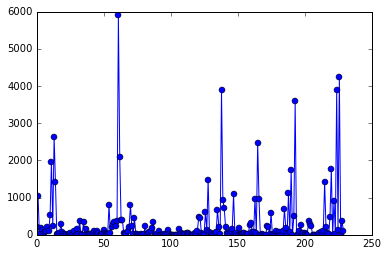

In [4]:
list_nf=[]
count_f=plt.array([0]*230)
count_not=0
for s in list_space:
    if s in dict_space.keys():
        #print "Found Element in dictionary for space_group_name {0}, with space_group number {1}".format(s,dict_space[s])
        count_f[dict_space[s]-1]+=1
    else:
        #print "Entry not found for space group name ",s
        list_nf.append(s)
print "Found Entries={0}, Not Found Entries={1}".format(sum(count_f),len(list_space)-sum(count_f))
print "Found No Entries for these spacegroups",plt.array(plt.where(count_f==0))+1
plt.plot(plt.arange(230),count_f,'bo-')



We see that all the lines have been mapped successfully and that a few spacegroups are not present at all while others  have as many as ~6000 entries.

What the spacegroups with the most compounds?

In [27]:
sg_counts = sorted(enumerate(count_f,1), key = lambda x: x[1], reverse = True)
print(" SG Count")
print("--- -----")
for i in range(20):
    sg,count = sg_counts[i]
    print("{:3}  {:4}".format(sg, count))

 SG Count
--- -----
 62  5916
227  4241
225  3903
139  3891
194  3586
 14  2640
166  2469
 63  2101
 12  1952
221  1763
191  1746
129  1478
 15  1428
216  1425
189  1112
148  1087
  2  1038
164   968
167   954
140   933


How are the counts distributed among the space groups? Turns out it's not quite exponentially decaying.

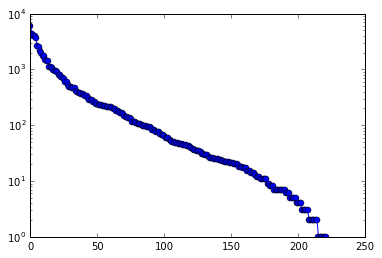

In [21]:
plt.semilogy(range(len(sg_counts)), [e[1] for e in sg_counts], "o-")